In [ ]:
import pandas as pd

In [ ]:
results_wk3=pd.read_csv("results_wk3.csv")

In [ ]:
results_wk12=pd.read_csv("results_wk1_and_2.csv")

In [57]:
results_wk12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57376 entries, 0 to 57375
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0.1                  57376 non-null  int64  
 1   level_0                       57376 non-null  int64  
 2   Unnamed: 0                    57376 non-null  int64  
 3   index                         57376 non-null  int64  
 4   author_id                     57376 non-null  int64  
 5   text                          57376 non-null  object 
 6   edit_history_tweet_ids        57376 non-null  object 
 7   context_annotations           33129 non-null  object 
 8   id                            57376 non-null  int64  
 9   created_at                    57376 non-null  object 
 10  public_metrics_retweet_count  57376 non-null  int64  
 11  public_metrics_reply_count    57376 non-null  int64  
 12  public_metrics_like_count     57376 non-null  int64  
 13  h

Combine all weeks of data

In [59]:
results_wk123=pd.concat((results_wk3,results_wk12.iloc[:,3:18]), axis=0).reset_index()

In [64]:
results_wk123["text_no_punc_lower_no_dig"].isnull().sum()

1

In [65]:
results_wk123= results_wk123[results_wk123["text_no_punc_lower_no_dig"].notna()]

In [66]:
results_wk123.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82479 entries, 0 to 82479
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   level_0                       82479 non-null  int64  
 1   index                         82479 non-null  int64  
 2   text                          82479 non-null  object 
 3   edit_history_tweet_ids        82479 non-null  object 
 4   created_at                    82479 non-null  object 
 5   id                            82479 non-null  object 
 6   author_id                     82479 non-null  object 
 7   context_annotations           48503 non-null  object 
 8   public_metrics_retweet_count  82479 non-null  int64  
 9   public_metrics_reply_count    82479 non-null  int64  
 10  public_metrics_like_count     82479 non-null  int64  
 11  public_metrics_quote_count    25104 non-null  float64
 12  hashtag                       68950 non-null  object 
 13  t

In [200]:
results_wk123[['public_metrics_retweet_count','public_metrics_reply_count','public_metrics_like_count']].describe()
#not a super retweetable or liked topic, I guess? Or maybe it's hard for things to go viral on twitter in this space. At any rate, it's highlyg skewed

,public_metrics_retweet_count,public_metrics_reply_count,public_metrics_like_count
count,82479.000000,82479.000000,82479.000000
mean,2.253834,1.076407,7.662435
std,54.529841,33.383572,146.402882
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,2.000000
max,8167.000000,5382.000000,20650.000000


In [227]:
results_wk123.public_metrics_like_count.info()


<class 'pandas.core.series.Series'>
Int64Index: 82479 entries, 0 to 82479
Series name: public_metrics_like_count
Non-Null Count  Dtype  
--------------  -----  
82479 non-null  float32
dtypes: float32(1)
memory usage: 3.0 MB


In [225]:
results_wk123['public_metrics_like_count']=pd.to_numeric(results_wk123['public_metrics_like_count'], downcast='float')

Vadar Sentiment Analysis

In [110]:
!pip install vaderSentiment

In [119]:
### From metis VADER exercise
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
my_text = results_wk123["text_no_punc_lower_no_dig"][0]
analyzer = SentimentIntensityAnalyzer()
score = analyzer.polarity_scores(my_text)
sentiment_0 = score['compound']

sentiment_0

0.9161

In [120]:
results_wk123['score'] = results_wk123["text_no_punc_lower_no_dig"].map(analyzer.polarity_scores).map(lambda x: x.get('compound'))
results_wk123.head(10)

,level_0,index,text,edit_history_tweet_ids,created_at,id,author_id,context_annotations,public_metrics_retweet_count,public_metrics_reply_count,public_metrics_like_count,public_metrics_quote_count,hashtag,text_no_url,text_no_punc,text_no_punc_lower,text_no_punc_lower_no_dig,score
0,0,0,"@CryptoTitans1 @rfntoken I believe in social, ...",[1587260766889005056],2022-11-01T01:50:31.000Z,1587260766889005056,1585908019262431233,"[{'domain': {'id': '46', 'name': 'Business Tax...",0,0,0,0.0,[],"I believe in social, economic and environmen...",I believe in social economic and environmen...,i believe in social economic and environmen...,i believe in social economic and environmen...,0.9161
1,1,1,"""Professional All Plastic Trigger Sprayer""\n📊I...",[1587260170081431552],2022-11-01T01:48:09.000Z,1587260170081431552,1452543405628669953,NaN,0,0,0,0.0,"[PlasticTriggerSprayer, TriggerSprayer]","""Professional All Plastic Trigger Sprayer""📊It ...",Professional All Plastic Trigger Sprayer 📊It ...,professional all plastic trigger sprayer 📊it ...,professional all plastic trigger sprayer 📊it ...,0.0000
2,2,6,@JamieStickman @olgatokariuk @POTUS You call y...,[1587258609406205953],2022-11-01T01:41:56.000Z,1587258609406205953,1520591224972972038,"[{'domain': {'id': '10', 'name': 'Person', 'de...",0,0,0,0.0,[],You call yourself an environmentalist and y...,You call yourself an environmentalist and y...,you call yourself an environmentalist and y...,you call yourself an environmentalist and y...,0.0000
3,3,9,@algore You’re irrelevant please keep quiet. I...,[1587257288653299712],2022-11-01T01:36:42.000Z,1587257288653299712,400113195,"[{'domain': {'id': '10', 'name': 'Person', 'de...",0,0,0,0.0,[],You’re irrelevant please keep quiet. It’ll he...,You’re irrelevant please keep quiet It’ll he...,you’re irrelevant please keep quiet it’ll he...,you’re irrelevant please keep quiet it’ll he...,0.6124
4,4,10,Hey green thumbs! Your number one un-green com...,[1587256544806113281],2022-11-01T01:33:44.000Z,1587256544806113281,1329492481248014336,"[{'domain': {'id': '46', 'name': 'Business Tax...",0,0,0,0.0,[],Hey green thumbs! Your number one un-green com...,Hey green thumbs Your number one un green com...,hey green thumbs your number one un green com...,hey green thumbs your number one un green com...,0.3818
5,5,11,Don’t you get it? Brick and mortar schools hav...,[1587256087195033600],2022-11-01T01:31:55.000Z,1587256087195033600,1306423214713733120,"[{'domain': {'id': '46', 'name': 'Business Tax...",0,0,0,0.0,[],Don’t you get it? Brick and mortar schools hav...,Don’t you get it Brick and mortar schools hav...,don’t you get it brick and mortar schools hav...,don’t you get it brick and mortar schools hav...,-0.2960
6,6,12,One just tracks your carbon footprint as you s...,[1587256084443660289],2022-11-01T01:31:54.000Z,1587256084443660289,133773057,NaN,0,0,0,0.0,[],One just tracks your carbon footprint as you s...,One just tracks your carbon footprint as you s...,one just tracks your carbon footprint as you s...,one just tracks your carbon footprint as you s...,-0.1027
7,7,13,"Like Ted, she’s a despicable waste of a carbon...",[1587255112854020103],2022-11-01T01:28:03.000Z,1587255112854020103,1242695022,"[{'domain': {'id': '10', 'name': 'Person', 'de...",0,0,0,0.0,[],"Like Ted, she’s a despicable waste of a carbon...",Like Ted she’s a despicable waste of a carbon...,like ted she’s a despicable waste of a carbon...,like ted she’s a despicable waste of a carbon...,-0.0772
8,8,14,Your carbon footprint is a LIE. https://t.co/b...,[1587254528516161536],2022-11-01T01:25:44.000Z,1587254528516161536,1572142462721736704,NaN,0,0,0,0.0,[],Your carbon footprint is a LIE. via,Your carbon footprint is a LIE via,your carbon footprint is a lie via,your carbon footprint is a lie via,0.0000
9,9,16,@libsoftiktok Wowzer the carbon footprint she has,[1587253130391359494],2022-11-01T01:20:10.000Z,1587253130391359494,1415018087238103040,NaN,0,0,0,0.0,[],Wowzer the carbon footprint she has

In [121]:
results_wk123.iloc[results_wk123.score.idxmax()] #well, this doesn't seem particularly positive... Is it reading the emojis?

level_0                                                                     17070
index                                                                       18946
text                            NET ZERO 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂 bullshitamagedon 😂...
edit_history_tweet_ids                                    ['1580146908706000902']
created_at                                               2022-10-12T10:42:35.000Z
id                                                            1580146908706000902
author_id                                                     1125144456141914115
context_annotations                                                           NaN
public_metrics_retweet_count                                                    1
public_metrics_reply_count                                                      0
public_metrics_like_count                                                       4
public_metrics_quote_count                                                    NaN
hashtag         

In [122]:
subset=results_wk123[results_wk123['score'] > results_wk123['score'].quantile(0.98)]

In [123]:
subset[['text','score']]

,text,score
0,"@CryptoTitans1 @rfntoken I believe in social, ...",0.9161
232,Have a great and safe Halloween! Nothing spook...,0.9538
342,United Green Energy has Green-e® certified ren...,0.9300
433,Whether you are looking to optimise your energ...,0.9274
548,TakeCarbon is glad to announce its new video d...,0.9524
...,...,...
82170,@Nigel_Farage @daisy_ljmartin4 Yes we all feel...,0.9618
82241,Attending the launch of @iom3 Material Change:...,0.9274
82343,✔️protect people needing most support while st...,0.9189
82411,🏆 Mitsubishi Electric receives 3 award nominat...,0.9118


In [124]:
results_wk123.iloc[results_wk123.score.idxmin()] #seems to be relatively negative

level_0                                                                        64
index                                                                          64
text                            @abcnews But what about the housing affordabil...
edit_history_tweet_ids                                    ['1582221601889693696']
created_at                                               2022-10-18T04:06:40.000Z
id                                                            1582221601889693696
author_id                                                     1581816660964491264
context_annotations             [{'domain': {'id': '67', 'name': 'Interests an...
public_metrics_retweet_count                                                    0
public_metrics_reply_count                                                      0
public_metrics_like_count                                                       1
public_metrics_quote_count                                                    NaN
hashtag         

In [125]:
#https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column

conditions = [
    (results_wk123['score']>0),
    (results_wk123['score']<0)
    ]
choices = ['positive', 'negative']
results_wk123['sentiment'] = np.select(conditions, choices, default='neutral')

In [126]:
import numpy as np

In [127]:
results_wk123[['score','sentiment']].head(10) 

,score,sentiment
0,0.9161,positive
1,0.0000,neutral
2,0.0000,neutral
3,0.6124,positive
4,0.3818,positive
5,-0.2960,negative
6,-0.1027,negative
7,-0.0772,negative
8,0.0000,neutral
9,0.0000,neutral


In [129]:
results_wk123.score[results_wk123.sentiment == 'positive'].mean()

0.5095405614475135

In [130]:
results_wk123.score[results_wk123.sentiment == 'negative'].mean()

-0.4529084169404435

In [872]:
results_wk12_v2.score[results_wk12_v2.sentiment == 'neutral'].mean()

0.0

<AxesSubplot:xlabel='score', ylabel='Count'>

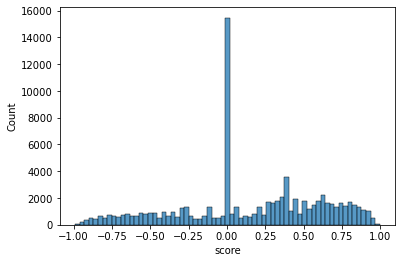

In [131]:
import seaborn as sb
sb.histplot(results_wk123.score)



Repeat sentiment analysis below without removing punctuation and upper case

In [132]:
### From metis VADER exercise
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
my_text = results_wk123["text_no_url"][0]
analyzer = SentimentIntensityAnalyzer()
score_no_clean = analyzer.polarity_scores(my_text)
sentiment_0 = score_no_clean['compound']

sentiment_0
results_wk123['score_no_clean'] = results_wk123["text_no_url"].map(analyzer.polarity_scores).map(lambda x: x.get('compound'))
results_wk123.head(10)

,level_0,index,text,edit_history_tweet_ids,created_at,id,author_id,context_annotations,public_metrics_retweet_count,public_metrics_reply_count,public_metrics_like_count,public_metrics_quote_count,hashtag,text_no_url,text_no_punc,text_no_punc_lower,text_no_punc_lower_no_dig,score,sentiment,score_no_clean
0,0,0,"@CryptoTitans1 @rfntoken I believe in social, ...",[1587260766889005056],2022-11-01T01:50:31.000Z,1587260766889005056,1585908019262431233,"[{'domain': {'id': '46', 'name': 'Business Tax...",0,0,0,0.0,[],"I believe in social, economic and environmen...",I believe in social economic and environmen...,i believe in social economic and environmen...,i believe in social economic and environmen...,0.9161,positive,0.8625
1,1,1,"""Professional All Plastic Trigger Sprayer""\n📊I...",[1587260170081431552],2022-11-01T01:48:09.000Z,1587260170081431552,1452543405628669953,NaN,0,0,0,0.0,"[PlasticTriggerSprayer, TriggerSprayer]","""Professional All Plastic Trigger Sprayer""📊It ...",Professional All Plastic Trigger Sprayer 📊It ...,professional all plastic trigger sprayer 📊it ...,professional all plastic trigger sprayer 📊it ...,0.0000,neutral,0.0000
2,2,6,@JamieStickman @olgatokariuk @POTUS You call y...,[1587258609406205953],2022-11-01T01:41:56.000Z,1587258609406205953,1520591224972972038,"[{'domain': {'id': '10', 'name': 'Person', 'de...",0,0,0,0.0,[],You call yourself an environmentalist and y...,You call yourself an environmentalist and y...,you call yourself an environmentalist and y...,you call yourself an environmentalist and y...,0.0000,neutral,0.0000
3,3,9,@algore You’re irrelevant please keep quiet. I...,[1587257288653299712],2022-11-01T01:36:42.000Z,1587257288653299712,400113195,"[{'domain': {'id': '10', 'name': 'Person', 'de...",0,0,0,0.0,[],You’re irrelevant please keep quiet. It’ll he...,You’re irrelevant please keep quiet It’ll he...,you’re irrelevant please keep quiet it’ll he...,you’re irrelevant please keep quiet it’ll he...,0.6124,positive,0.6124
4,4,10,Hey green thumbs! Your number one un-green com...,[1587256544806113281],2022-11-01T01:33:44.000Z,1587256544806113281,1329492481248014336,"[{'domain': {'id': '46', 'name': 'Business Tax...",0,0,0,0.0,[],Hey green thumbs! Your number one un-green com...,Hey green thumbs Your number one un green com...,hey green thumbs your number one un green com...,hey green thumbs your number one un green com...,0.3818,positive,0.5815
5,5,11,Don’t you get it? Brick and mortar schools hav...,[1587256087195033600],2022-11-01T01:31:55.000Z,1587256087195033600,1306423214713733120,"[{'domain': {'id': '46', 'name': 'Business Tax...",0,0,0,0.0,[],Don’t you get it? Brick and mortar schools hav...,Don’t you get it Brick and mortar schools hav...,don’t you get it brick and mortar schools hav...,don’t you get it brick and mortar schools hav...,-0.2960,negative,-0.3595
6,6,12,One just tracks your carbon footprint as you s...,[1587256084443660289],2022-11-01T01:31:54.000Z,1587256084443660289,133773057,NaN,0,0,0,0.0,[],One just tracks your carbon footprint as you s...,One just tracks your carbon footprint as you s...,one just tracks your carbon footprint as you s...,one just tracks your carbon footprint as you s...,-0.1027,negative,-0.1027
7,7,13,"Like Ted, she’s a despicable waste of a carbon...",[1587255112854020103],2022-11-01T01:28:03.000Z,1587255112854020103,1242695022,"[{'domain': {'id': '10', 'name': 'Person', 'de...",0,0,0,0.0,[],"Like Ted, she’s a despicable waste of a carbon...",Like Ted she’s a despicable waste of a carbon...,like ted she’s a despicable waste of a carbon...,like ted she’s a despicable waste of a carbon...,-0.0772,negative,-0.0772
8,8,14,Your carbon footprint is a LIE. https://t.co/b...,[1587254528516161536],2022-11-01T01:25:44.000Z,1587254528516161536,1572142462721736704,NaN,0,0,0,0.0,[],Your carbon footprint is a LIE. via,Your carbon footprint is a LIE via,your carbon footprint is a lie via,your carbon footprint is a lie via,0.0000,neutral,0.0000
9,9,16,@libsoftiktok Wowzer

In [133]:
results_wk123.iloc[results_wk123.score_no_clean.idxmax()] #well, this is a negative socre, I'm not sure why this came up in idxmax

level_0                                                                     17070
index                                                                       18946
text                            NET ZERO 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂 bullshitamagedon 😂...
edit_history_tweet_ids                                    ['1580146908706000902']
created_at                                               2022-10-12T10:42:35.000Z
id                                                            1580146908706000902
author_id                                                     1125144456141914115
context_annotations                                                           NaN
public_metrics_retweet_count                                                    1
public_metrics_reply_count                                                      0
public_metrics_like_count                                                       4
public_metrics_quote_count                                                    NaN
hashtag         

In [134]:
subset=results_wk123[results_wk123['score_no_clean'] > results_wk123['score_no_clean'].quantile(0.98)]

In [135]:
subset[['text','score_no_clean']]

,text,score_no_clean
25,@csilverandgold walking is a really nice way t...,0.9020
196,"@EthicalHour Hi Colin here, I make sustainable...",0.9070
232,Have a great and safe Halloween! Nothing spook...,0.9594
292,Communist princeling says what? \n\nThis man l...,0.9022
342,United Green Energy has Green-e® certified ren...,0.9336
...,...,...
82241,Attending the launch of @iom3 Material Change:...,0.9274
82251,Add this to your #VFS22 plans!\nNET ZERO 360 m...,0.9098
82343,✔️protect people needing most support while st...,0.9189
82411,🏆 Mitsubishi Electric receives 3 award nominat...,0.9118


In [136]:
results_wk123.iloc[results_wk123.score.idxmin()] #seems to be relatively negative

level_0                                                                        64
index                                                                          64
text                            @abcnews But what about the housing affordabil...
edit_history_tweet_ids                                    ['1582221601889693696']
created_at                                               2022-10-18T04:06:40.000Z
id                                                            1582221601889693696
author_id                                                     1581816660964491264
context_annotations             [{'domain': {'id': '67', 'name': 'Interests an...
public_metrics_retweet_count                                                    0
public_metrics_reply_count                                                      0
public_metrics_like_count                                                       1
public_metrics_quote_count                                                    NaN
hashtag         

In [137]:
#https://stackoverflow.com/questions/19913659/pandas-conditional-creation-of-a-series-dataframe-column
import numpy as np
conditions = [
    (results_wk123['score_no_clean']>0),
    (results_wk123['score_no_clean']<0)
    ]
choices = ['positive', 'negative']
results_wk123['sentiment_no_clean'] = np.select(conditions, choices, default='neutral')

In [138]:
results_wk123[['score_no_clean','sentiment_no_clean']].head(10) 

,score_no_clean,sentiment_no_clean
0,0.8625,positive
1,0.0000,neutral
2,0.0000,neutral
3,0.6124,positive
4,0.5815,positive
5,-0.3595,negative
6,-0.1027,negative
7,-0.0772,negative
8,0.0000,neutral
9,0.0000,neutral


In [205]:
results_wk12_v2.score_no_clean[results_wk12_v2.sentiment_no_clean == 'positive'].mean()

0.5138219461697536

In [206]:
results_wk12_v2.score_no_clean[results_wk12_v2.sentiment_no_clean == 'negative'].mean()

-0.4677335141903258

In [ ]:
results_wk12_v2.score[results_wk12_v2.sentiment == 'neutral'].mean()

0.0

<AxesSubplot:xlabel='score_no_clean', ylabel='Count'>

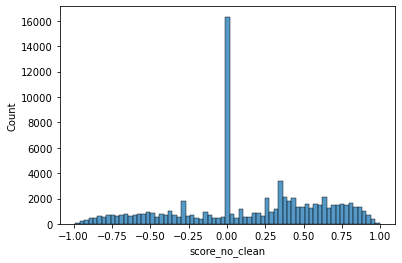

In [139]:
import seaborn as sb
sb.histplot(results_wk123.score_no_clean)



In [334]:
lsa = TruncatedSVD(6)
doc_topic = lsa.fit_transform(testing)
lsa.explained_variance_ratio_
doc_topic_df = pd.DataFrame(doc_topic, index = results_wk123.id)
doc_topic_df['Primary Topic'] = doc_topic_df.idxmax(axis=1)

In [336]:
doc_topic_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82479 entries, 1587260766889005056 to 1583001834519941120
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   0              82479 non-null  float64
 1   1              82479 non-null  float64
 2   2              82479 non-null  float64
 3   3              82479 non-null  float64
 4   4              82479 non-null  float64
 5   5              82479 non-null  float64
 6   Primary Topic  82479 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 5.0+ MB


In [344]:
doc_topic_df['Primary Topic'].value_counts()

0    51589
1    21288
4     3077
5     3073
3     1877
2     1575
Name: Primary Topic, dtype: int64

In [345]:
results_wk123_merge['Primary Topic'].value_counts()

0    51589
1    21288
4     3077
5     3073
3     1877
2     1575
Name: Primary Topic, dtype: int64

In [337]:
results_wk123_merge=results_wk123.merge(doc_topic_df, right_on='id', left_on='id', how='left')

In [391]:
results_wk123_merge=results_wk123_merge.sort_values(by=['sentiment_no_clean'], ascending=False)

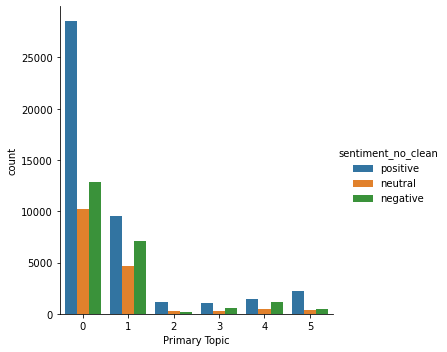

In [396]:
sb.catplot(data=results_wk123_merge, x="Primary Topic", hue='sentiment_no_clean', kind="count")
plt.savefig("counts_sentiment_topic.png",facecolor="white")

In [ ]:
results_wk123_merge.groupby('Primary Topic', 'sentiment_no_clean').value_counts() / results_wk123_merge.groupby('Primary Topic').value_counts() 

In [369]:
df=results_wk123_merge.groupby(['Primary Topic', 'sentiment_no_clean']).count()

In [374]:
df=df.iloc[:,:1]

In [381]:
#df['sum']=df.groupby('sentiment_no_clean').sum('index')
df['percentage']=df['index']/df.groupby(['Primary Topic'])['index'].agg('sum')

In [386]:
df.reset_index(inplace=True)

In [389]:
df=df.sort_values(by=['sentiment_no_clean'], ascending=False)

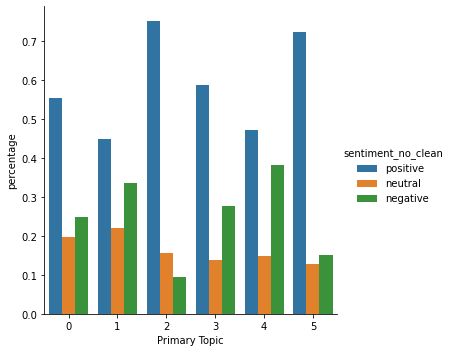

In [395]:
sb.catplot(data=df, x= "Primary Topic", y='percentage',hue='sentiment_no_clean', kind="bar")
plt.savefig("percent_sentiment_topic.png",facecolor="white")


In [354]:
results_wk123_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82479 entries, 0 to 82478
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   index                         82479 non-null  int64  
 1   text                          82479 non-null  object 
 2   edit_history_tweet_ids        82479 non-null  object 
 3   created_at                    82479 non-null  object 
 4   id                            82479 non-null  object 
 5   author_id                     82479 non-null  object 
 6   context_annotations           48503 non-null  object 
 7   public_metrics_retweet_count  82479 non-null  int64  
 8   public_metrics_reply_count    82479 non-null  int64  
 9   public_metrics_like_count     82479 non-null  float32
 10  public_metrics_quote_count    25104 non-null  float64
 11  hashtag                       68950 non-null  object 
 12  text_no_url                   82479 non-null  object 
 13  t

/Users/sidan/opt/anaconda3/envs/classification/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 54.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


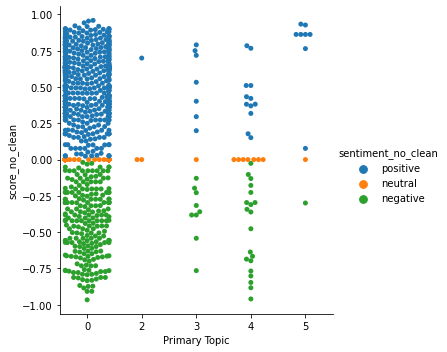

In [350]:
sb.catplot(data=results_wk123_merge.iloc[:10000,:], x="Primary Topic", y='score_no_clean', hue='sentiment_no_clean', kind="swarm")

In [ ]:
sb.catplot(data=results_wk123_merge, x="Primary Topic", kind="count")

In [876]:
pip install textblob


     |████████████████████████████████| 636 kB 2.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


Textblob Sentiment Analysis

In [140]:
from textblob import TextBlob

In [141]:
#https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity
  

In [215]:
#https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524
#Create two new columns ‘Subjectivity’ & ‘Polarity’
results_wk12_v2['TextBlob_Subjectivity'] =   results_wk12_v2['text_no_punc_lower_no_dig'].apply(getSubjectivity)
results_wk12_v2['TextBlob_Polarity'] = results_wk12_v2['text_no_punc_lower_no_dig'].apply(getPolarity)
def getAnalysis(score):
  if score < 0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else:
    return "Positive"

results_wk12_v2 ['TextBlob_Analysis'] = results_wk12_v2["TextBlob_Polarity"].apply(getAnalysis )


In [145]:
#try the same code above again bu with the text still punctuated and with upper/lower case
results_wk123['TextBlob_Subjectivity'] =   results_wk123['text_no_url'].apply(getSubjectivity)
results_wk123['TextBlob_Polarity'] = results_wk123['text_no_url'].apply(getPolarity)
def getAnalysis(score):
  if score < 0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else:
    return "Positive"

results_wk123['TextBlob_Analysis'] = results_wk123["TextBlob_Polarity"].apply(getAnalysis )

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline

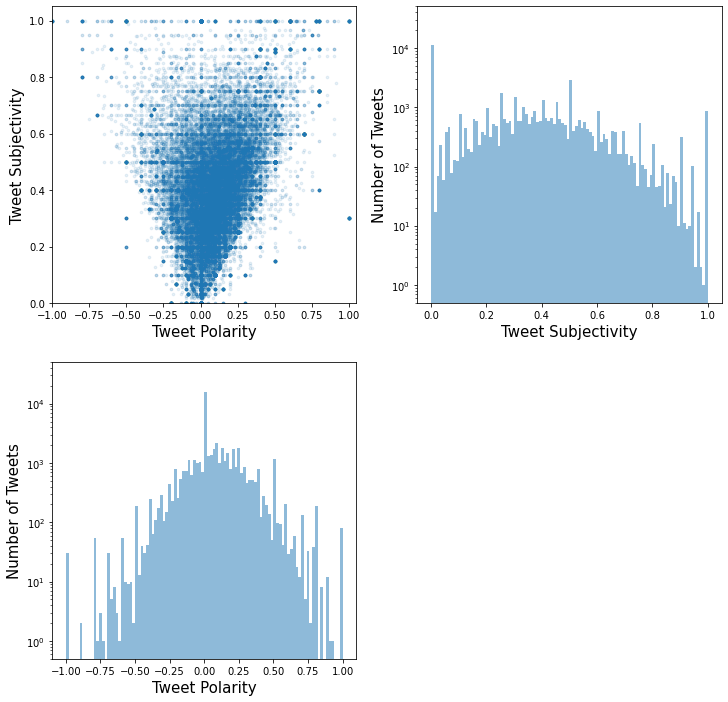

In [216]:
#this result is removing punctuation and capitalization
#https://github.com/LucDemortier/MachineLearningWithTweets/blob/master/YogaTweetAnalysis.ipynb
fig, axes = plt.subplots( nrows=2, ncols=2, figsize=(12,12) )
axes[0,0].scatter(results_wk12_v2['TextBlob_Polarity'],results_wk12_v2['TextBlob_Subjectivity'],alpha=0.1, s=7)
axes[0,0].set_xlabel("Tweet Polarity",fontsize=15)
axes[0,0].set_xlim(-1.0,1.05)
axes[0,0].set_ylabel("Tweet Subjectivity",fontsize=15)
axes[0,0].set_ylim(0.0,1.05)
axes[0,1].hist(results_wk12_v2['TextBlob_Subjectivity'],bins=100,range=[0.0,1.0],alpha=0.5)
axes[0,1].set_xlabel("Tweet Subjectivity",fontsize=15)
axes[0,1].set_ylabel("Number of Tweets",fontsize=15)
axes[0,1].set_yscale("log")
axes[0,1].set_ylim(0.5,50000.0)
axes[1,0].hist(results_wk12_v2['TextBlob_Polarity'],bins=100,range=[-1.0,1.0],alpha=0.5)
axes[1,0].set_xlabel("Tweet Polarity",fontsize=15)
axes[1,0].set_ylabel("Number of Tweets",fontsize=15)
axes[1,0].set_yscale("log")
axes[1,0].set_ylim(0.5,50000.0)
axes[1,1].axis("off")
plt.show()

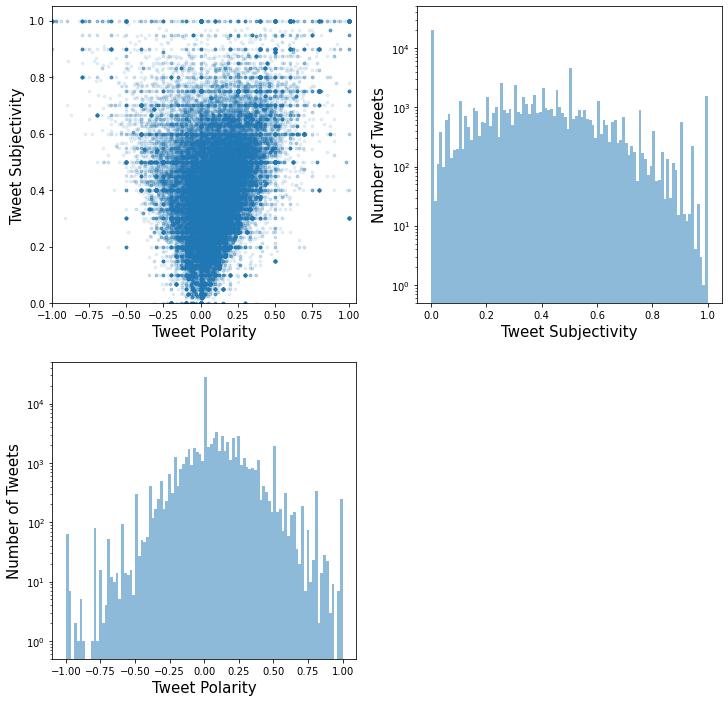

In [147]:
#this result is with punctuation and capitalization
#https://github.com/LucDemortier/MachineLearningWithTweets/blob/master/YogaTweetAnalysis.ipynb
fig, axes = plt.subplots( nrows=2, ncols=2, figsize=(12,12) )
axes[0,0].scatter(results_wk123['TextBlob_Polarity'],results_wk123['TextBlob_Subjectivity'],alpha=0.1, s=7)
axes[0,0].set_xlabel("Tweet Polarity",fontsize=15)
axes[0,0].set_xlim(-1.0,1.05)
axes[0,0].set_ylabel("Tweet Subjectivity",fontsize=15)
axes[0,0].set_ylim(0.0,1.05)
axes[0,1].hist(results_wk123['TextBlob_Subjectivity'],bins=100,range=[0.0,1.0],alpha=0.5)
axes[0,1].set_xlabel("Tweet Subjectivity",fontsize=15)
axes[0,1].set_ylabel("Number of Tweets",fontsize=15)
axes[0,1].set_yscale("log")
axes[0,1].set_ylim(0.5,50000.0)
axes[1,0].hist(results_wk123['TextBlob_Polarity'],bins=100,range=[-1.0,1.0],alpha=0.5)
axes[1,0].set_xlabel("Tweet Polarity",fontsize=15)
axes[1,0].set_ylabel("Number of Tweets",fontsize=15)
axes[1,0].set_yscale("log")
axes[1,0].set_ylim(0.5,50000.0)
axes[1,1].axis("off")
plt.show()

In [148]:
results_wk123.to_csv('results_wk1_and_2_and_3.csv')

In [894]:
results_wk123[['TextBlob_Subjectivity','TextBlob_Polarity','TextBlob_Analysis']].head(30)

,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,0.000000,0.000000,Neutral
1,0.000000,0.000000,Neutral
2,0.625000,0.400000,Positive
3,0.100000,0.000000,Neutral
4,0.000000,0.000000,Neutral
5,1.000000,0.000000,Neutral
6,0.766667,0.360000,Positive
7,0.500000,0.500000,Positive
8,0.428750,0.383750,Positive
9,0.428750,0.383750,Positive


In [841]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer



sent_analyzer = SentimentIntensityAnalyzer()

NameError: name 'SentimentIntensityAnalyzer' is not defined

In [283]:
pip install nltk

     |████████████████████████████████| 1.5 MB 5.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [149]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from nltk.tokenize import sent_tokenize

In [300]:
!pip install tweet-preprocessor

In [150]:
import nltk
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package wordnet to /Users/sidan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/sidan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [230]:
data=[]
query_string = ['boris', 'uk']
regex=re.compile(r'\b(' + '|'.join(query_string) + r')\b')
data = [[tweet.text, tweet.public_metrics_retweet_count, tweet.public_metrics_reply_count, tweet.public_metrics_like_count]
for tweet in results_wk12_v2
if regex.search(tweet.text)]
 

AttributeError: 'str' object has no attribute 'text'

In [226]:
data

<generator object <genexpr> at 0x7f898aeb7cf0>

In [227]:
df = pd.DataFrame(data)

AttributeError: 'str' object has no attribute 'text'

In [223]:
#https://stackoverflow.com/questions/60873474/find-specific-words-on-dataframe/60873747#60873747 - thanks to Sancia for finding this
ids =  results_wk12_v2.text_no_punc_lower_no_dig.str.contains('boris$|boris-|boris', flags = re.IGNORECASE, regex = True, na = False)

In [105]:
ids =  results_wk12_v2.text_no_punc_lower_no_dig.str.contains('William$|William-|William', flags = re.IGNORECASE, regex = True, na = False)

In [106]:
results_wk12_v2[ids]

,index,author_id,text,edit_history_tweet_ids,context_annotations,id,created_at,public_metrics_retweet_count,public_metrics_reply_count,public_metrics_like_count,...,text_no_url,text_no_punc,text_no_punc_lower,text_no_punc_lower_no_dig,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,score_no_clean,sentiment_no_clean,sentiment_pos
629,635,366532044,@biffrbear @GNev2 @Gnev https://t.co/EHFFt4ixk...,['1582030175469830145'],"[{'domain': {'id': '10', 'name': 'Person', 'de...",1582030175469830145,2022-10-17T15:26:01.000Z,0,0,1,...,carbon footprint? Prince William the princ...,carbon footprint Prince William the princ...,carbon footprint prince william the princ...,carbon footprint prince william the princ...,0.237500,0.000000,Neutral,0.0000,neutral,positive
630,636,366532044,@terrychelton @GNev2 https://t.co/EHFFt4ixk9 c...,['1582030096721797120'],"[{'domain': {'id': '10', 'name': 'Person', 'de...",1582030096721797120,2022-10-17T15:25:42.000Z,0,0,1,...,carbon footprint? Prince William the prince...,carbon footprint Prince William the prince...,carbon footprint prince william the prince...,carbon footprint prince william the prince...,0.237500,0.000000,Neutral,0.0000,neutral,positive
636,643,366532044,@MartinSLewis https://t.co/EHFFt4ixk9 carbon f...,['1582028919695212544'],"[{'domain': {'id': '10', 'name': 'Person', 'de...",1582028919695212544,2022-10-17T15:21:01.000Z,0,0,1,...,carbon footprint? Prince William the prince ...,carbon footprint Prince William the prince ...,carbon footprint prince william the prince ...,carbon footprint prince william the prince ...,0.237500,0.000000,Neutral,0.0000,neutral,positive
668,675,366532044,@EarthshotPrize Past Present TODAY\nhttps://t....,['1582022605573218306'],"[{'domain': {'id': '10', 'name': 'Person', 'de...",1582022605573218306,2022-10-17T14:55:56.000Z,0,0,2,...,Past Present TODAY carbon footprint?Prince Wi...,Past Present TODAY carbon footprint Prince Wi...,past present today carbon footprint prince wi...,past present today carbon footprint prince wi...,0.181250,-0.062500,Negative,0.5106,positive,positive
1213,1238,366532044,@belperbarlow @Kigali_Memorial https://t.co/EH...,['1581843469579845632'],"[{'domain': {'id': '10', 'name': 'Person', 'de...",1581843469579845632,2022-10-17T03:04:07.000Z,0,0,1,...,carbon footprint? Prince William the prince...,carbon footprint Prince William the prince...,carbon footprint prince william the prince...,carbon footprint prince william the prince...,0.237500,0.000000,Neutral,0.0000,neutral,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50438,21161,21902180,Zscaler is attending Cyber Security Summit LA ...,['1584496670795972608'],"[{'domain': {'id': '46', 'name': 'Business Tax...",1584496670795972608,2022-10-24T10:46:59.000Z,0,0,0,...,Zscaler is attending Cyber Security Summit LA ...,Zscaler is attending Cyber Security Summit LA ...,zscaler is attending cyber security summit la ...,zscaler is attending cyber security summit la ...,0.800000,0.500000,Positive,0.9215,positive,positive
51135,22045,21902180,Zscaler is attending Cyber Security Summit LA ...,['1584367895076687873'],"[{'domain': {'id': '46', 'name': 'Business Tax...",1584367895076687873,2022-10-24T02:15:16.000Z,0,0,0,...,Zscaler is attending Cyber Security Summit LA ...,Zscaler is attending Cyber Security Summit LA ...,zscaler is attending cyber security summit la ...,zscaler is attending cyber security summit la ...,0.800000,0.500000,Positive,0.9215,positive,positive
52829,24132,366105237,Zscaler is attending Cyber Security Summit LA ...,['1584086990529536000'],"[{'domain': {'id': '46', 'name': 'Business Tax...",1584086990529536000,2022-10-23T07:39:04.000Z,0,0,1,...,Zscaler is attending Cyber Security Summit LA ...,Zscaler is attending Cyber Security Summit LA ...,zscaler is attending cyber security summit la ...,zscaler is attending cyber security summit la ...,0.800000,0.500000,Positive,0.9215,positive,positive
59476,31820,1468320647

In [210]:
results_wk12_v2=results_wk12_v2.iloc[:,2:].reset_index()

In [217]:

for i in range(0,len(results_wk12_v2.text_no_punc_lower_no_dig)):
    if ('boris' and 'net zero' and 'immigration') in results_wk12_v2.text_no_punc_lower_no_dig[i]:
        print (i,results_wk12_v2.text[i]) 

2078 @MikeFromBC123 @DanAlbas Does WEF massive third world immigration increase Canadas carbon footprint ?
2522 @kingston_elaine @TiceRichard LibLabConGreen all purport to be green, yet advocate mass immigration🤔🙄
How green is mass immigration ?
What's the carbon footprint of having to build houses here for people who walked away from houses in their own countries ?
What's the carbon footprint of more traffic jams? https://t.co/9b1dZQRkWC
3354 @ExtinctionR What does mass immigration from lower to higher carbon footprint counties do to CO2e?

When will ER come out against environmentally damaging mass immigration?

Never, it will just get spoilt brats like these to deface masterpieces 🤷‍♂️
4258 @lealingtsang @Fervent23 @GBNEWS Clearly, mass immigration makes Britain more overcrowded and increases carbon footprint. So why do you think this guy refused to accept that simple fact?
4265 @lealingtsang @Fervent23 @GBNEWS But that's the point. Steyn just brilliantly proved that it does mean ex

Scattertext 

In [116]:
import scattertext as st

In [117]:
#using scattertext example from Metis 
corpus = st.CorpusFromPandas(
    results_wk123.iloc[:,1:],
    category_col = 'sentiment_pos',
    text_col = 'text_no_url',
    nlp=st.whitespace_nlp_with_sentences
).build()

KeyError: "['sentiment_pos'] not in index"

In [133]:
html = st.produce_scattertext_explorer(
        corpus,
        category="positive",
        category_name='positive',
        not_category_name='negative',
        minimum_term_frequency=20,
        pmi_threshold_coefficient=5,
        width_in_pixels=1000,
        #metadata=results_wk12_v2['public_metrics_like_count'],
        )

In [134]:
open('carbon_cred.html', 'wb').write(html.encode('utf-8'));

In [163]:
results_wk123_pos_neg = results_wk123[results_wk123['sentiment_no_clean']!='neutral']

In [182]:
results_wk123_pos_neg.sentiment_no_clean.value_counts()

positive    44014
negative    22255
Name: sentiment_no_clean, dtype: int64

In [165]:
corpus = st.CorpusFromPandas(
    results_wk123_pos_neg.iloc[:,1:],
    category_col = 'sentiment_no_clean',
    text_col = 'text_no_url',
    nlp=st.whitespace_nlp_with_sentences
).build()

In [166]:
html_2 = st.produce_scattertext_explorer(
        corpus,
        category="positive",
        category_name='positive',
        not_category_name='negative',
        minimum_term_frequency=20,
        pmi_threshold_coefficient=5,
        width_in_pixels=1000,
        #metadata=results_wk12_v2['public_metrics_like_count'],
        )

In [167]:
open('carbon_cred2_full.html', 'wb').write(html_2.encode('utf-8'));

In [236]:
results_wk12_pos_neutral = results_wk12_v2[results_wk12_v2['sentiment_no_clean']!='negative']

In [237]:
corpus = st.CorpusFromPandas(
    results_wk12_pos_neutral.iloc[:,1:],
    category_col = 'sentiment_no_clean',
    text_col = 'text_no_url',
    nlp=st.whitespace_nlp_with_sentences
).build()

In [240]:
html_3 = st.produce_scattertext_explorer(
        corpus,
        category="positive",
        category_name='positive',
        not_category_name='neutral',
        minimum_term_frequency=20,
        pmi_threshold_coefficient=5,
        width_in_pixels=1000,
        #metadata=results_wk12_v2['public_metrics_like_count'],
        )

In [241]:
open('carbon_cred3.html', 'wb').write(html_3.encode('utf-8'));